# Wine
> Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

import sys
from os.path import abspath

try:
    from GAparsimony import GAparsimony, Population, getFitness
    from GAparsimony.util import svm
except:
    sys.path.append(abspath("C:/Users/Millan/Desktop/GAparsimony"))
    from GAparsimony import GAparsimony, Population, getFitness
    from GAparsimony.util import svm

In [2]:
wine = load_wine()
X, y = wine.data, wine.target 
X = StandardScaler().fit_transform(X)

In [3]:
rerank_error = 0.001
params = {"C":{"range": (00.0001, 99.9999), "type": Population.FLOAT}, 
            "gamma":{"range": (0.00001,0.99999), "type": Population.FLOAT}, 
            "kernel": {"value": "poly", "type": Population.CONSTANT}}

In [4]:
fitness = getFitness(SVC, cohen_kappa_score, svm, regression=False, test_size=0.2, random_state=42, n_jobs=-1)

In [5]:
GAparsimony_model = GAparsimony(fitness=fitness,
                                  params=params,
                                  features=wine.feature_names,
                                  keep_history = True,
                                  rerank_error = rerank_error,
                                  popSize = 40,
                                  maxiter = 25, early_stop=10,
                                  feat_thres=0.90, # Perc selected features in first generation
                                  feat_mut_thres=0.10, # Prob of a feature to be one in mutation
                                  seed_ini = 1234)

In [6]:
GAparsimony_model.fit(X, y)

GA-PARSIMONY | iter = 0
   MeanVal = 0.879549  |  ValBest = 0.9314718  |  TstBest = 0.9574468  |ComplexBest = 10000000045.0| Time(min) = 0.1408285  

GA-PARSIMONY | iter = 1
  MeanVal = 0.9075035  |  ValBest = 0.9496819  |  TstBest = 0.9142857  |ComplexBest = 11000000060.0| Time(min) = 0.0897466  

GA-PARSIMONY | iter = 2
  MeanVal = 0.9183232  |  ValBest = 0.9496819  |  TstBest = 0.9142857  |ComplexBest = 11000000060.0|  Time(min) = 0.078255  

GA-PARSIMONY | iter = 3
  MeanVal = 0.9219764  |  ValBest = 0.9534295  |  TstBest = 0.9568345  |ComplexBest = 10000000043.0| Time(min) = 0.0723326  

GA-PARSIMONY | iter = 4
  MeanVal = 0.8932938  |  ValBest = 0.9534295  |  TstBest = 0.9568345  |ComplexBest = 10000000043.0| Time(min) = 0.0843356  

GA-PARSIMONY | iter = 5
  MeanVal = 0.9146229  |  ValBest = 0.9579681  |  TstBest = 0.9568345  |ComplexBest = 10000000047.0| Time(min) = 0.0793343  

GA-PARSIMONY | iter = 6
   MeanVal = 0.927178  |  ValBest = 0.9579697  |  TstBest = 0.9568345  |Comp

In [7]:
GAparsimony_model.summary()

+------------------------------------+
|             GA-PARSIMONY           |
+------------------------------------+

GA-PARSIMONY settings:
 Number of Parameters      = 2
 Number of Features        = 13
 Population size           = 40
 Maximum of generations    = 25
 Number of early-stop gen. = 10
 Elitism                   = 8
 Crossover probability     = 0.8
 Mutation probability      = 0.1
 Max diff(error) to ReRank = 0.001
 Perc. of 1s in first popu.= 0.9
 Prob. to be 1 in mutation = 0.1

 Search domain = 
                 C    gamma  alcohol  malic_acid  ash  alcalinity_of_ash  \
Min_param   0.0001  0.00001      0.0         0.0  0.0                0.0   
Max_param  99.9999  0.99999      1.0         1.0  1.0                1.0   

           magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
Min_param        0.0            0.0         0.0                   0.0   
Max_param        1.0            1.0         1.0                   1.0   

           proanthocyanins  color_

In [8]:
GAparsimony_model.importance()

+--------------------------------------------+
|                  GA-PARSIMONY              |
+--------------------------------------------+

Percentage of appearance of each feature in elitists: 

  alcohol  hue  ash proline alcalinity_of_ash od280/od315_of_diluted_wines  \
0     100  100  100     100           99.4318                      99.4318   

  flavanoids color_intensity nonflavanoid_phenols malic_acid proanthocyanins  \
0      93.75         44.3182              41.4773    34.6591         14.7727   

  magnesium total_phenols  
0   7.38636       1.70455  


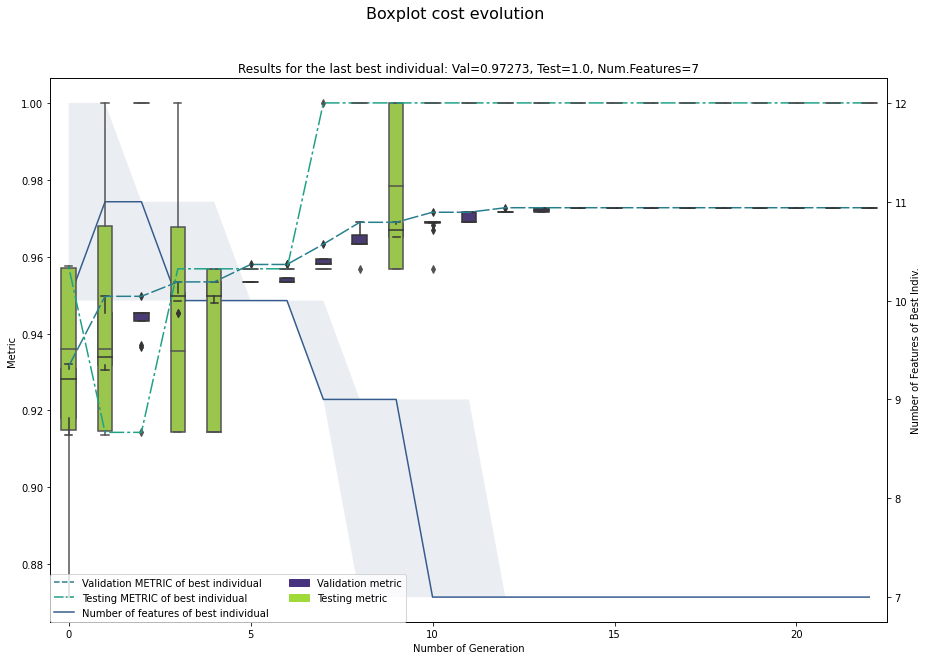

In [9]:
GAparsimony_model.plot(size_plot=(15,10))